#### Handling Imbalanced Dataset with Machine Learning

In [ ]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_main_only_imp_col_csv.csv')
df.head()

,vessel_class,gap_hours,iuu_caught,spherical_distances,eez_check,Ocean List New whose false were in OG
0,other,13.016667,0,207.942845,0,atlantic
1,other,13.850000,0,9.704232,0,atlantic
2,other,33.733333,0,10.789069,1,atlantic
3,other,30.650000,0,11.695860,1,atlantic
4,other,50.283333,0,93.113335,1,atlantic


In [ ]:
df.shape

(55141, 6)

In [ ]:
df['iuu_caught'].value_counts()

0    55041
1      100
Name: iuu_caught, dtype: int64

In [ ]:
#### Independent and Dependent Features
X=df.drop("iuu_caught",axis=1)
y=df.iuu_caught

### One Hot Encoding

In [ ]:
print(df['vessel_class'].unique())
print(df['Ocean List New whose false were in OG'].unique())

['other' 'trawlers' 'squid_jigger' 'tuna_purse_seines'
 'drifting_longlines']
['atlantic' 'southern' 'mediterranean' 'arctic' 'pacific' 'indian']


In [ ]:
print(df['vessel_class'].value_counts())
print(df['Ocean List New whose false were in OG'].value_counts())

drifting_longlines    18608
squid_jigger          15965
tuna_purse_seines      8620
trawlers               7865
other                  4083
Name: vessel_class, dtype: int64
pacific          31870
atlantic         16469
indian            6176
arctic             499
southern           116
mediterranean       11
Name: Ocean List New whose false were in OG, dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['vessel_class', 'Ocean List New whose false were in OG'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check  \
0  13.016667           0           207.942845          0   
1  13.850000           0             9.704232          0   
2  33.733333           0            10.789069          1   
3  30.650000           0            11.695860          1   
4  50.283333           0            93.113335          1   

   vessel_class_drifting_longlines  vessel_class_other  \
0                                0                   1   
1                                0                   1   
2                                0                   1   
3                                0                   1   
4                                0                   1   

   vessel_class_squid_jigger  vessel_class_trawlers  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4              

In [ ]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

#### SMOTETomek

In [ ]:
y.value_counts()

0    55041
1      100
Name: iuu_caught, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

# smote = SMOTE(sampling_strategy='minority')
adasyn = ADASYN(sampling_strategy='minority')
X_train, y_train = adasyn.fit_resample(X_train,y_train)

# y_sm.value_counts()

In [ ]:
y_train.value_counts()

0    33024
1    33010
Name: iuu_caught, dtype: int64

In [ ]:
y_test.value_counts()

0    22017
1       40
Name: iuu_caught, dtype: int64

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Mean f1: 0.000
Mean recall: 0.000
Mean precision: 0.000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


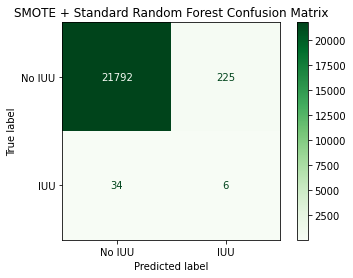

In [ ]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(X_train, y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['No IUU', 'IUU'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     22017
           1       0.03      0.15      0.04        40

    accuracy                           0.99     22057
   macro avg       0.51      0.57      0.52     22057
weighted avg       1.00      0.99      0.99     22057



In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the models
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model on the test data
score = ensemble.score(X_test, y_test)

print(score)

0.9827265720632906


In [ ]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = ensemble.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22017
           1       0.03      0.30      0.06        40

    accuracy                           0.98     22057
   macro avg       0.52      0.64      0.53     22057
weighted avg       1.00      0.98      0.99     22057



In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Create the base models
rf = RandomForestClassifier(n_estimators=100)
xgb_clf = xgb.XGBClassifier(n_estimators=200)
ann = MLPClassifier(hidden_layer_sizes=(50,50))

# Create the meta-model
meta_model = MLPClassifier(hidden_layer_sizes=(50,50))

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb_clf), ('ann', ann)], final_estimator=meta_model)

# Train the classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     22017
           1       0.03      0.42      0.05        40

    accuracy                           0.97     22057
   macro avg       0.51      0.70      0.52     22057
weighted avg       1.00      0.97      0.98     22057



In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[21396   621]
 [   23    17]]
